In [3]:
## Preamble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## SImple Model of a Pendulem

Want to numerically model the following system

$u''+\omega^2u=0,\;u(0) = I,\; u'(0)=0$

it has the analytical solution:

$u(t) = I\cos(\omega t)$

so hopefully our numerical model will approach this solution!

### Step 1 - Discretise the domain

### Step 2 - Furfil Eqn in the discretised domain
$u''(t_n)+\omega^2u(t_n)=0$
### Step 3 - replace derivatives with finite differnces
here we will use 2nd order accurate central differnce scheme

$u''(t_n) \approx \frac{u^{n+1}-2u^n+u^{n+1}}{\Delta t^2}$

which leads to

$u''(t_n) \approx \frac{u^{n+1}-2u^n+u^{n+1}}{\Delta t^2} = -\omega^2u^n$

also need to dicretise the I.C's / B.C's!!

$\frac{u^1-u^{-1}}{2\Delta t}=0$

### Step 4 - Formulate the recursive algorithm

to do this assume time steps $u^{n-1}$ & $u^n$ are already known and rearrange above for the unkown value

$u^{n+1} = 2u^n-u^{n-1}-\Delta t^2\omega^2u^n$

### step 5 - What about the first time step?
re-arrange the I.C in terms of $u^{-1}$ and subing into the above eqn leads to

$u^1=u^0-\frac{1}{2}\Delta t^2\omega^2u^0$

Doing this in code


In [4]:
def SimpleOscillator(T,dt,I,w):
    """
    Solve u'' + w**2*u =0 for t in (0,T), u(o) = I and u'=0,
    by a central difference method with timestep dt
    """   
    dt = float(dt)             # constant time step
    Nt = int(round(T/dt))
    t = np.linspace(0,T, Nt+1) # Mesh points in time
    u = np.zeros(Nt+1)         # solution

    # algoritmn
    u[0] = I
    u[1] = u[0]*(1-0.5*dt**2*w**2)
    for n in range(1,Nt):
        u[n+1] = u[n]*(2-dt**2*w**2)-u[n-1]
    return u,t

def u_exact(T,dt,I,w):
    dt = float(dt)             # constant time step
    Nt = int(round(T/dt))
    t = np.linspace(0,T, Nt+1) # Mesh points in time
    return I*np.cos(w*t),t
    


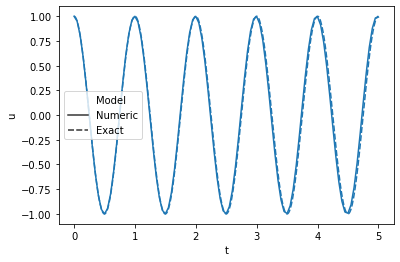

In [5]:
I = 1
w = 2*np.pi
dt =0.05
num_periods = 5
P = 2*np.pi/w
T = P*num_periods

# get numerical solution
u,t = SimpleOscillator(T,dt,I,w)
NumericDf = pd.DataFrame(np.column_stack((u,t)),columns=['u','t'])
NumericDf['Model'] = 'Numeric'

# get exact solution
u,t = u_exact(T,0.01,I,w)
ExactDf = pd.DataFrame(np.column_stack((u,t)),columns=['u','t'])
ExactDf['Model'] = 'Exact'

# combine DataFrames
Df = pd.concat([NumericDf,ExactDf],axis=0)

# Plot the results
sns.lineplot(data=Df,x='t',y='u',style='Model')

## Add velocity calculations to our functions
The I.C defines n=0,. an use centrall difference method for the innner points

$u'(n) \approx v(n)=\frac{u^{n+1} - u^{n-1}}{\Delta t}$

for the last point we ca use a backward differnce routine

$v^n = \frac{u^n - u^{n-1}}{\Delta t}$

In [6]:
## as a func
def get_v(u,dt,v_0=0):
    v = np.zeros_like(u)
    v[1:-1] = (u[2:]-u[:-2])/(2*dt)
    v[0]=v_0
    v[-1] = (u(-1)-u(-2))/dt

## Verification - convergence rate
by completeing multiple simultions with halving time steps and computing the error with the exact solution we can see the convergence of the finite difference method

for any two given signals (s and e) the differnce / error is defined as:

$E_i = \sqrt{\Delta t_i \left( \sum^{Nt-1}_{n=0}\left(u^n_s-u^n_e\right)\right)^2}$

$r_i = \frac{ln\left(\frac{E_{i-1}}{E_i}\right)}{ln\left(\frac{\Delta t_{i-1}}{\Delta t_i}\right)}$

## Lets model a pendulem


EOM:

$\theta''=-\frac{g\sin\theta}{L}+\frac{F(t)}{mL}$

use verlet intergration:
https://en.wikipedia.org/wiki/Verlet_integration

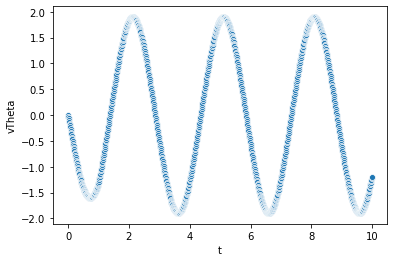

In [58]:
T = 10
dt = 0.01
m = 5
L = 2
g = 9.81

N = np.floor(T/dt)+1
T = (N-1)*dt
t = np.arange(0,N+1)*dt
theta = np.zeros_like(t)
vTheta = np.zeros_like(t)

def A(theta,F_n):
    return F_n/(m*L)-g/L*np.sin(theta)
def F(t):
    return -10 if t<1 else 0
# IC's
theta[0] = np.pi/6
vTheta[0] = 0

theta[1]=theta[0]+vTheta[0]*dt+0.5*A(theta[0],t[0])*dt**2

for n in range(1,int(N)):
    theta[n+1] = 2*theta[n]-theta[n-1]+A(theta[n],F(t[n]))*dt**2
    
# Calculate velocities
vTheta[1:-2] = (theta[2:-1] - theta[0:-3])/(2*dt)

t= t[:-2]
theta=theta[:-2]
vTheta=vTheta[:-2]

data = np.column_stack((t,theta,vTheta))
df = pd.DataFrame(data=data,columns=['t','Theta','vTheta'])
sns.scatterplot(data=df,x='t',y='vTheta')
    

In [51]:
np.arange(0,N+1)*dt

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1])

In [36]:
np.linspace(0,T+dt,(T+dt*2)/dt)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])